In [1]:
#1
#calculating probabilities and quantiles of arrivals
#plotting the distribution of arrivals
#simulating arrivals
#2
#calculating probabilities and quantiles of inter-event times
#plotting the distribution of inter-event times
#simulating inter-event times
#3
#simulating compound Poisson processes
#4
#Fitting a Poisson process to sample 
#future arrivals
#thinning a Poisson process

In [2]:
#calculating probabilities and quantiles of arrivals
#dpois(<n>,<rate>{Lambda*(t-s)})
#ppois(<n>,<rate>) "Greater than probability"
#qpois(<percentage point>,<rate>)
#rpois()

In [3]:
dpois(6,3*3)

[1] 0.09109032

In [4]:
sum(dpois(0:7,3*3)*100)

[1] 32.3897

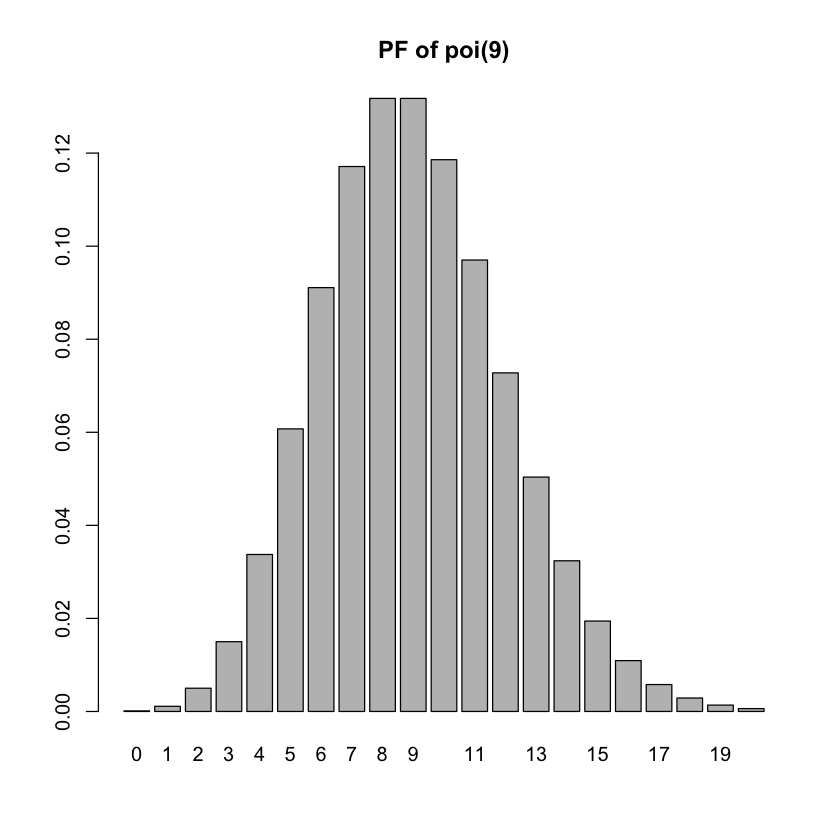

In [5]:
barplot(dpois(0:20,9),main="PF of poi(9)",xlab="",ylab="",names.arg = 0:20)

In [6]:
ppois(9, 3 * 2)

[1] 0.916076

In [7]:
1 - ppois(9, 3 * 2)
ppois(9,3*2,lower = FALSE)

[1] 0.08392402

[1] 0.08392402

In [8]:
qpois(0.25,3*3)

[1] 7

In [9]:
qpois(seq(0,1,by=0.25),9)

[1]   0   7   9  11 Inf

In [11]:
set.seed(123)
rpois(20,3*12)
mean(rpois(20,3*12))

[1] 32 43 25 36 46 38 28 25 43 38 38 36 32 43 40 35 31 29 33 31

[1] 35.95

In [12]:
#Inter Arrival Times
#calculating probabilities and quantiles of Inter-arrival times
#dexp(<n>,<rate>{Lambda*(t-s)})
#pexp(<n>,<rate>) "Greater than probability"
#qexp(<percentage point>,<rate>)
#rexp()

In [19]:
dexp(0.5,3)

[1] 0.6693905

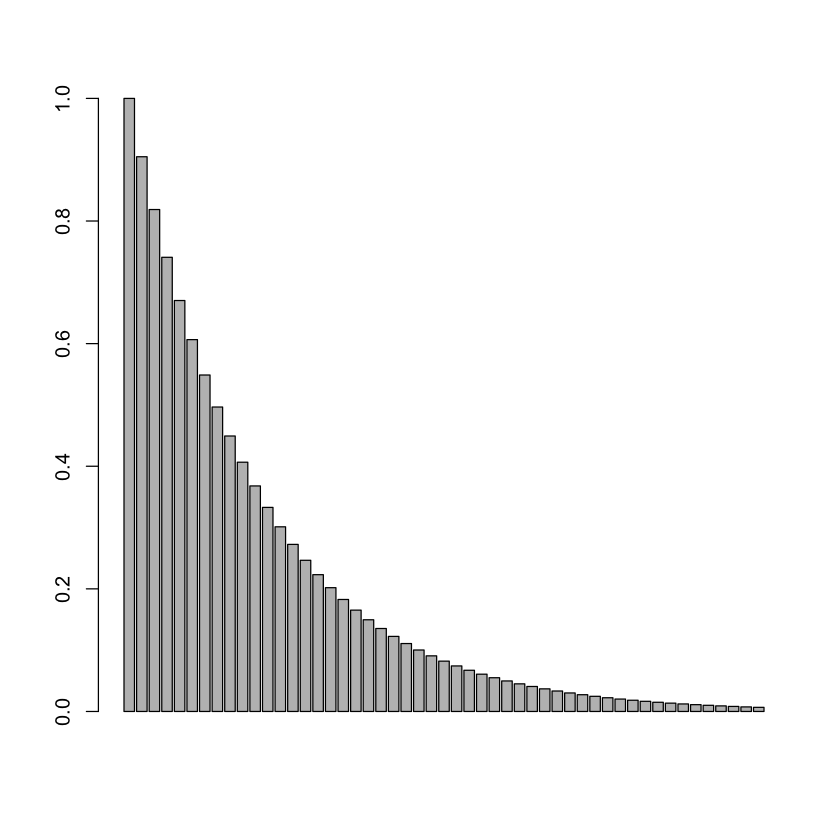

In [24]:
barplot(dexp(seq(0,5,0.1)),3)

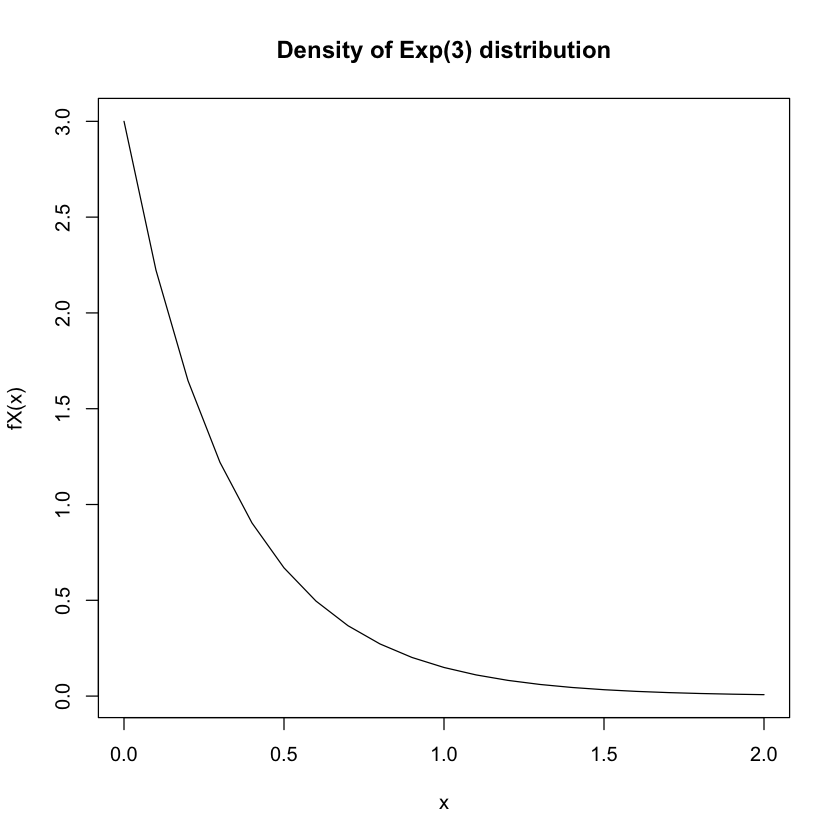

In [14]:
plot(seq(0,2,0.1), dexp(seq(0,2,0.1), 3), type = "l",
                 main = "Density of Exp(3) distribution",
                 xlab = "x",
                 ylab = "fX(x)")

In [15]:
pexp(0.25,3)

[1] 0.5276334

In [16]:
1 - pexp(0.25,3)
pexp(0.25,3,lower=FALSE)

[1] 0.4723666

[1] 0.4723666

In [17]:
qexp(0.5,3)
qexp(0.5,3)*60

[1] 0.2310491

[1] 13.86294

In [18]:
set.seed(123)
rexp(20,3)*60

[1] 16.8691452 11.5322054 26.5810974  0.6315472  1.1242195  6.3300243
 [7]  6.2845458  2.9053361 54.5247293  0.5830689 20.0966012  9.6042946
[13]  5.6202726  7.5423566  3.7656808 16.9957226 31.2640708  9.5752083
[19] 11.8186967 80.8202342

In [25]:
#Compound poisson Distribution
# Xi follow Binomial Distribution and N also follows poisson distribution
#Binomial (10,0.7) and Poisson follows poi(3)

In [26]:
set.seed(248)
arrivals = rpois(20,3*12)

In [27]:
set.seed(123)
people = rbinom(36,10,0.7)

In [30]:
toll = people * 3
sum(toll)

[1] 705

In [31]:
#We have seen the amount of toll per first hour, in which 36 boats are arriving, and first boat will have 8 people
#on board, 6 people and so on

In [34]:
#R function to calculate the Total toll for a day
total.tolls = numeric(20)
set.seed(123)
for (i in 1:length(arrivals)){
    people = rbinom(arrivals[i],10,0.7)
    total.tolls[i] = sum(people*3)
}
total.tolls

[1] 705 705 855 750 756 657 792 795 651 819 888 669 453 729 678 882 672 753 801
[20] 813

In [35]:
length(total.tolls[total.tolls > 800])/length(total.tolls)

[1] 0.3

In [56]:
#R function to calculate the Total toll for a day
arrivals = rpois(1000,3*12)
total.tolls = numeric(1000)
set.seed(123)
for (i in 1:length(arrivals)){
    people = rbinom(arrivals[i],10,0.7)
    total.tolls[i] = sum(people*3)
}
head(total.tolls)
length(total.tolls[total.tolls > 800])/length(total.tolls)

[1] 705 669 609 735 831 738

[1] 0.345

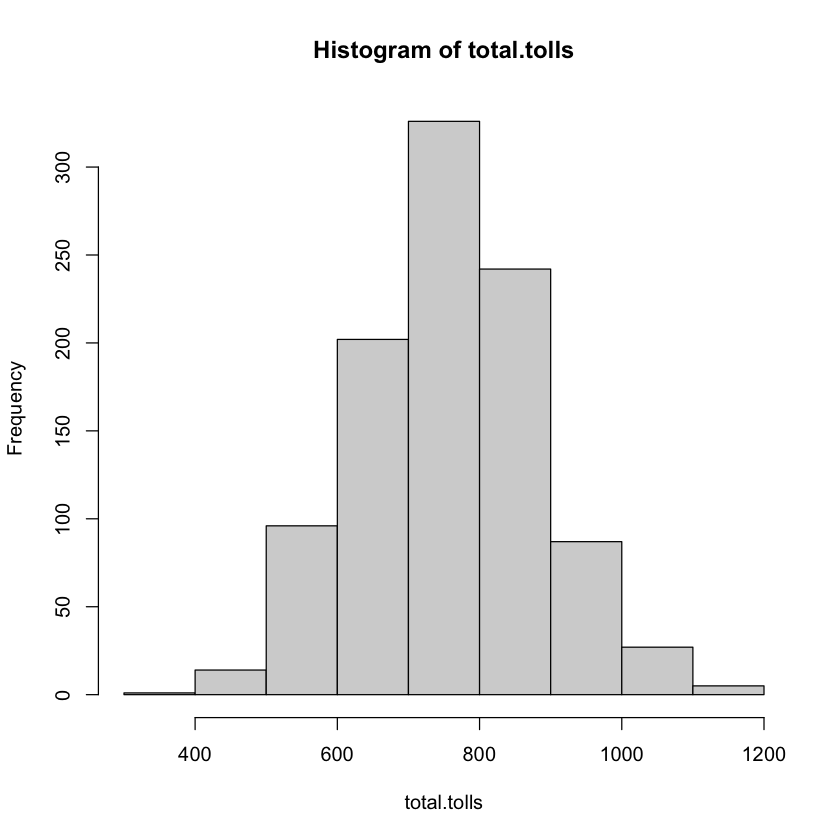

In [37]:
hist(total.tolls)
#graph is showing that mean is roughly near to 750, lets calculate and see if that is the case

In [38]:
mean(total.tolls)
sd(total.tolls)

[1] 758.271

[1] 125.9009

In [39]:
#4
#Fitting a Poisson process to sample 
#future arrivals
#thinning a Poisson process

In [40]:
getwd()

[1] "/Users/trijot/Desktop"

In [42]:
claims = read.csv("example_claims.csv")

In [43]:
head(claims)

,claim.date,claim.amount,claim.type
,<chr>,<int>,<chr>
1,12/10/2017,27,Motor
2,03/06/2014,92,House
3,12/05/2015,78,Motor
4,10/06/2019,5,House
5,26/04/2013,8,Motor
6,15/02/2016,36,Motor


In [44]:
nrow(claims)

[1] 2000

In [45]:
head(claims$claim.type)


[1] "Motor" "House" "Motor" "House" "Motor" "Motor"

In [46]:
head(claims[claims$claim.type == "House", ])

,claim.date,claim.amount,claim.type
,<chr>,<int>,<chr>
2,03/06/2014,92,House
4,10/06/2019,5,House
7,21/04/2010,74,House
8,05/03/2012,83,House
9,29/03/2019,58,House
13,03/06/2019,46,House


In [47]:
str(claims)

'data.frame':	2000 obs. of  3 variables:
 $ claim.date  : chr  "12/10/2017" "03/06/2014" "12/05/2015" "10/06/2019" ...
 $ claim.amount: int  27 92 78 5 8 36 74 83 58 34 ...
 $ claim.type  : chr  "Motor" "House" "Motor" "House" ...


In [51]:
claims$claim.date = as.Date(claims$claim.date, format("%d/%m/%Y"))
start.date = as.Date("01/01/2015", format("%d/%m/%Y"))
end.date = as.Date("31/12/2015", format("%d/%m/%Y"))
claims.2015 = claims[claims$claim.date >= start.date & claims$claim.date <= end.date, ]
head(claims.2015)

,claim.date,claim.amount,claim.type
,<date>,<int>,<chr>
3,2015-05-12,78,Motor
11,2015-06-06,58,Motor
18,2015-01-12,13,House
19,2015-11-17,36,House
21,2015-09-18,0,House
29,2015-01-09,62,House


In [53]:
#Fitting a Poisson process to the data
nrow(claims)
L = nrow(claims)/10
L

[1] 2000

[1] 200

In [54]:
#Future Arrivals
#Probability of 100 claims during the next half year
dpois(100,L*0.5)

[1] 0.039861

In [55]:
#Probability that next claims arrives within one day
pexp(1/365,L)

[1] 0.4218635

In [57]:
#Thinnning of poisson process
motor <- claims[claims$claim.type == "Motor",]
house <- claims[claims$claim.type == "House",]

In [60]:
head(motor)
head(house)

,claim.date,claim.amount,claim.type
,<date>,<int>,<chr>
1,2017-10-12,27,Motor
3,2015-05-12,78,Motor
5,2013-04-26,8,Motor
6,2016-02-15,36,Motor
10,2016-04-04,34,Motor
11,2015-06-06,58,Motor


,claim.date,claim.amount,claim.type
,<date>,<int>,<chr>
2,2014-06-03,92,House
4,2019-06-10,5,House
7,2010-04-21,74,House
8,2012-03-05,83,House
9,2019-03-29,58,House
13,2019-06-03,46,House


In [61]:
nrow(motor)
nrow(house)

[1] 679

[1] 1321

In [62]:
table(claims$claim.type)


House Motor 
 1321   679 

In [64]:
LM = nrow(motor)/10
LH = nrow(house)/10
LM
LH

[1] 67.9

[1] 132.1

In [65]:
nrow(motor)/10
nrow(house)/10

[1] 67.9

[1] 132.1